# Mini-Project 1: Machine Learning 101

Christian Martel (260867191)

Luka Loignon (260871296)

Marie Guertin (260870552)

# PART II: Letter Recognition Dataset

Dataset of character image features. Goal is to identify the letter.
https://archive.ics.uci.edu/ml/datasets/Letter+Recognition?fbclid=IwAR2QJ1w92tCvATRgyAbEDZ7sOuYViNBxxvfp7ofTFHCljA6TcV68EskJTKA

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/git/COMP551/projects/p1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/git/COMP551/projects/p1


In [2]:
## Imports and Setup

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# other py files
import my_validation
import my_preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.random.seed(1234)

## Data Preprocessing

### 1. Import Data

It is indicated in the letter-recognition.names file that there are no missing attribute values in the dataset. Hence, no imputation is required.

All the features are integers so no one-hot-encoding is required.

In [3]:

columns = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv("data/letter-recognition.data", usecols = range(15), names = columns)
display(df)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9


### 2. Normalization


In [4]:
x_df = df.iloc[:,1:]
y_df = df.iloc[:,0]
x_df =(x_df-x_df.min())/(x_df.max()-x_df.min())
display(x_df)


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333
19996,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000
19997,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000
19998,0.133333,0.200000,0.266667,0.133333,0.066667,0.533333,0.466667,0.133333,0.400000,0.666667,0.400000,0.533333,0.066667,0.600000


### 4. Gradient Boosting

{'high': 613,
 'onpix': 782,
 'width': 367,
 'x-bar': 975,
 'x-box': 284,
 'x-ege': 2172,
 'x2bar': 1835,
 'x2ybr': 1426,
 'xegvy': 1161,
 'xy2br': 1534,
 'xybar': 1571,
 'y-bar': 1064,
 'y-box': 519,
 'y2bar': 1952}

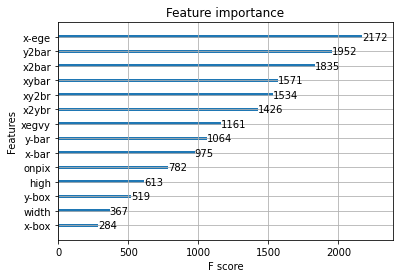

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
0,189.333333,1384.0,367.000000,1021.666667,260.666667,2600.0,4610.666667,0.000000,3904.000000,3142.000000,4753.333333,4090.666667,0.0,3096.0
1,473.333333,2076.0,367.000000,1430.333333,521.333333,3250.0,1773.333333,3058.333333,2602.666667,6807.666667,1426.000000,4602.000000,1448.0,3096.0
2,378.666667,1903.0,734.000000,1634.666667,1564.000000,3250.0,2128.000000,1223.333333,3904.000000,5236.666667,1426.000000,3579.333333,2172.0,2709.0
3,662.666667,1903.0,734.000000,1226.000000,782.000000,1625.0,3192.000000,2446.666667,3904.000000,2094.666667,1901.333333,5113.333333,4344.0,3870.0
4,189.333333,173.0,367.000000,204.333333,260.666667,2600.0,2128.000000,3670.000000,3904.000000,3142.000000,2376.666667,4602.000000,724.0,2709.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,189.333333,346.0,367.000000,613.000000,521.333333,2275.0,2482.666667,4281.666667,3904.000000,3142.000000,2852.000000,2045.333333,1448.0,3096.0
19996,662.666667,1730.0,978.666667,1634.666667,1042.666667,1300.0,2837.333333,3670.000000,5856.000000,6284.000000,4278.000000,6647.333333,1448.0,3483.0
19997,568.000000,1557.0,734.000000,1430.333333,1303.333333,1950.0,3901.333333,1835.000000,4554.666667,5760.333333,4278.000000,2556.666667,1448.0,4644.0
19998,189.333333,519.0,489.333333,408.666667,260.666667,2600.0,2482.666667,1223.333333,3904.000000,5236.666667,2852.000000,4090.666667,724.0,3483.0


In [5]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier()
best_score_tmp = model.fit(x_df, y_df)

display(best_score_tmp.get_booster().get_fscore())
tmp = best_score_tmp.get_booster().get_fscore()

# plot feature importance
best_score = plot_importance(model)
plt.show()

for key,value in tmp.items():
  x_df[key]=x_df[key] * 5*value

display(x_df)

### 2. Split Train Test

In [6]:
from sklearn.model_selection import train_test_split

num_instances = df.shape[0]
num_train = int(0.8 * num_instances)

x_train_df, x_test_df, y_train_df, y_test_df = x_df.iloc[:num_train,:], x_df.iloc[num_train:,:], y_df.iloc[:num_train], y_df.iloc[num_train:]

### 5. Convert to Numpy

In [7]:
# random permutations of indices
inds = np.random.permutation(range(x_train_df.shape[0]))

# split into features set and prediction set
x_train, y_train = x_train_df.to_numpy()[inds,:], y_train_df.to_numpy()[inds]
x_test, y_test = x_test_df.to_numpy(), y_test_df.to_numpy()

## Experiments

### 1. KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# number of folds for L-fold cross-validation
L = 5

# range of number of nearest neighbors (K)
K_list = range(1,31) # [1,2,...,30]

#### Cross-Validation

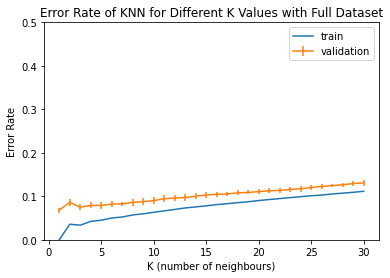

Best K parameter: 1


In [9]:
# knn cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_train, y_train, K_list, L, my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of KNN for Different K Values with Full Dataset')
plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_k = K_list[np.argmin(err_val_means)]
print("Best K parameter: {k}".format(k=best_k))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

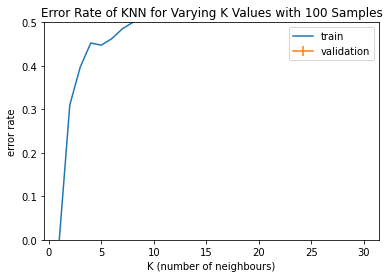

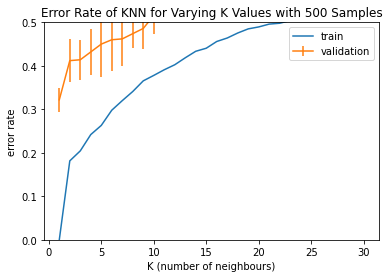

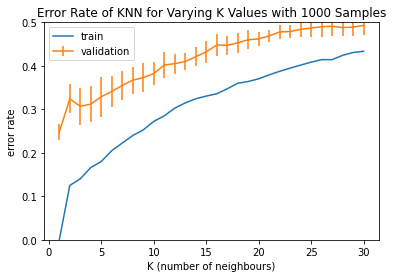

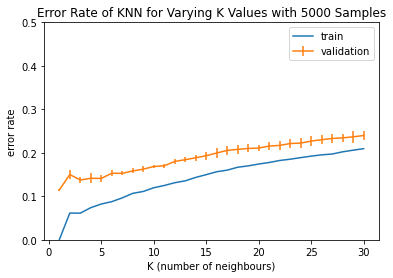

In [10]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_subset, y_subset, K_list, L, my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of KNN for Varying K Values with {size} Samples'.format(size = s))
    plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('K (number of neighbours)')
    plt.ylabel('error rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Parameter on Test Set

In [11]:
model = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

Error Rate on Test Set: 0.06525
Training time: 0.06521010398864746
Prediction time: 0.2520637512207031


### 2. DECISION-TREE

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Maximum tree depth hyper-parameter
max_depth_list = list(range(1,31)) #1-30

# Minimum samples per leaf parameter
min_samples_per_leaf_list = list(range(1, 301, 5)) #1-300

### For Maximum Depth Parameter

#### Cross-Validation

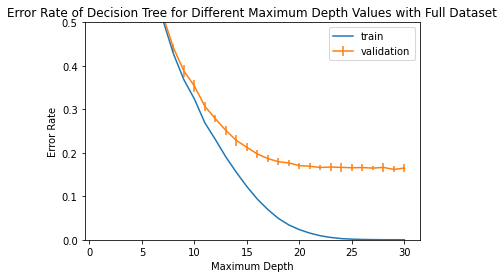

Best max depth parameter: 29


In [13]:
# decision tree cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train, max_depth_list=max_depth_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of Decision Tree for Different Maximum Depth Values with Full Dataset')
plt.plot(max_depth_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(max_depth_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('Maximum Depth')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_max_depth = max_depth_list[np.argmin(err_val_means)]
print("Best max depth parameter: {k}".format(k=best_max_depth))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

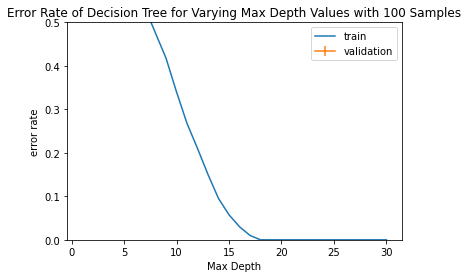

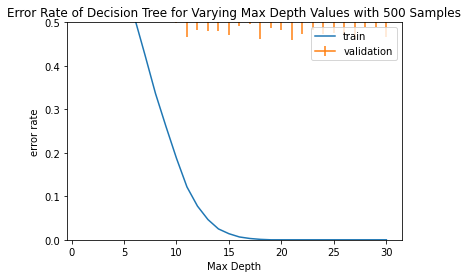

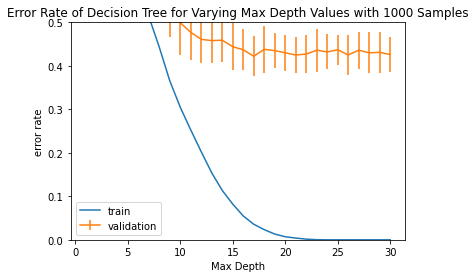

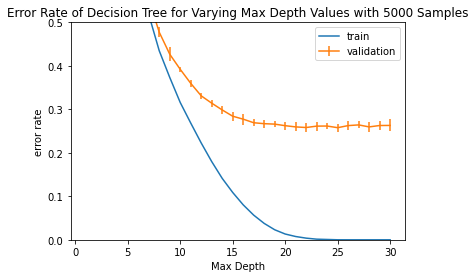

In [14]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_subset, y_subset, max_depth_list=max_depth_list, L=L, validation_metric_fn=my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of Decision Tree for Varying Max Depth Values with {size} Samples'.format(size = s))
    plt.plot(max_depth_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(max_depth_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('Max Depth')
    plt.ylabel('error rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Combination of Hyper-Parameters

In [15]:
model = DecisionTreeClassifier(max_depth=best_max_depth)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

Error Rate on Test Set: 0.06525
Training time: 0.11174178123474121
Prediction time: 0.00162506103515625


### For Minimum Samples per Leaf Parameter



#### Cross-Validation

Vary the minimum samples per leaf, with a constant None max depth.

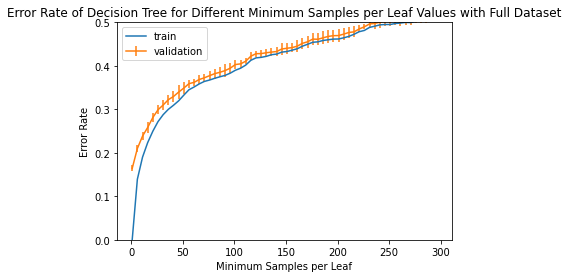

Best min samples per leaf parameter: 1


In [16]:
# decision tree cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of Decision Tree for Different Minimum Samples per Leaf Values with Full Dataset')
plt.plot(min_samples_per_leaf_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(min_samples_per_leaf_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('Minimum Samples per Leaf')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

best_min_samples = min_samples_per_leaf_list[np.argmin(err_val_means)]
print("Best min samples per leaf parameter: {k}".format(k=best_min_samples))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

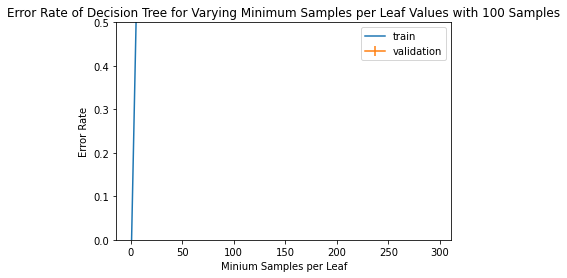

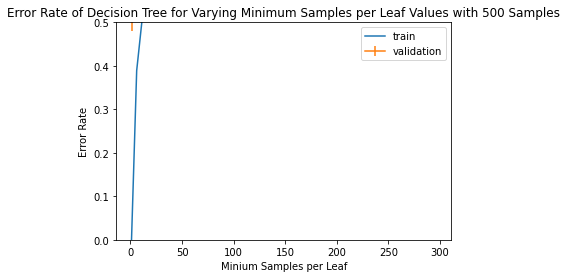

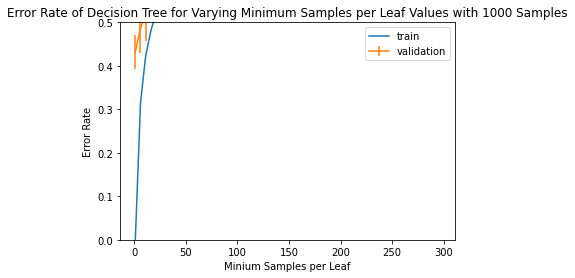

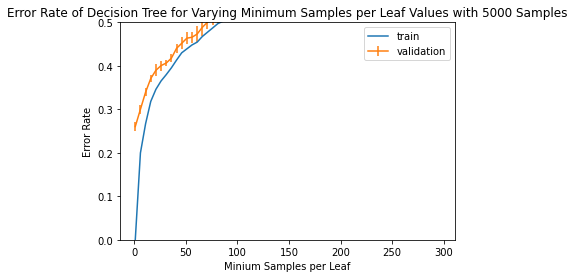

In [17]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_subset, y_subset, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of Decision Tree for Varying Minimum Samples per Leaf Values with {size} Samples'.format(size = s))
    plt.plot(min_samples_per_leaf_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(min_samples_per_leaf_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('Minium Samples per Leaf')
    plt.ylabel('Error Rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Parameter Combination on Test Set

In [18]:
model = DecisionTreeClassifier(min_samples_leaf=best_min_samples)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

Error Rate on Test Set: 0.15575
Training time: 0.11206293106079102
Prediction time: 0.0018558502197265625


### For Max Depth and Min Samples per Leaf Combined

#### Cross-Validation

(array([29]), array([0]))

Best max depth parameter: 30
Best min samples per leaf parameter: 1


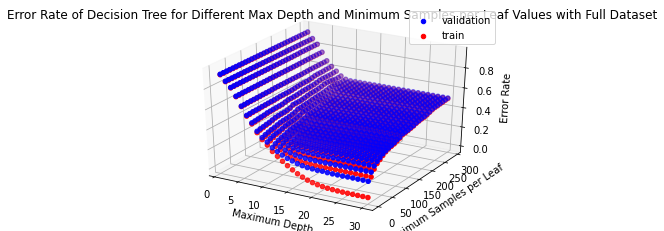

In [19]:
# Temporary lits to compute quickly
max_depth_list = list(range(1,31)) #1-30
min_samples_per_leaf_list = list(range(1,301,10)) #1-100

err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train,max_depth_list=max_depth_list, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis = -1)
err_train_means = np.mean(err_train_matrix, axis = -1)

err_val_min_params = np.where(err_val_means == np.amin(err_val_means))
display(err_val_min_params)
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
xdata = list()
for md in max_depth_list:
  for i in range(len(min_samples_per_leaf_list)):
    xdata.append(md)

ydata = len(max_depth_list) * min_samples_per_leaf_list

zdata_val, zdata_train = err_val_means.flatten(), err_train_means.flatten()

# The best parameter is the one providing the smallest error rate
best_max_depth_combine = max_depth_list[err_val_min_params[0][0]]
print("Best max depth parameter: {k}".format(k=best_max_depth_combine))
best_min_samples_combine = min_samples_per_leaf_list[err_val_min_params[1][0]]
print("Best min samples per leaf parameter: {k}".format(k=best_min_samples_combine))

# Visualization
ax.scatter3D(xdata, ydata, err_val_means, label='validation', color='blue')

ax.scatter3D(xdata,ydata, err_train_means, label='train', color='red')

ax.set_title('Error Rate of Decision Tree for Different Max Depth and Minimum Samples per Leaf Values with Full Dataset')
ax.legend()
ax.set_xlabel('Maximum Depth')
ax.set_ylabel('Minimum Samples per Leaf')
ax.set_zlabel('Error Rate')
plt.show()

#### Use Best Parameter Combination on Test Set

In [20]:
model = DecisionTreeClassifier(max_depth=best_max_depth_combine, min_samples_leaf=best_min_samples_combine)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

Error Rate on Test Set: 0.15675
Training time: 0.11966252326965332
Prediction time: 0.0016541481018066406
